In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Load Dataset
df=pd.read_csv("ecommerce_dataset_updated.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [9]:
#clean Data
#Remove null CustomerID
df=df.dropna(subset=['User_ID'])

In [12]:
# Convert Purchase_Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'],format="%d-%m-%Y")

In [13]:
# Set reference date
reference_date = df['Purchase_Date'].max() + pd.Timedelta(days=1)


In [15]:
# Calculate RFM
rfm = df.groupby('User_ID').agg({
    'Purchase_Date': lambda x: (reference_date - x.max()).days,
    'User_ID': 'count',
    'Final_Price(Rs.)': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [16]:
# Create Quantile Scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [17]:
# Segment Assignment
def segment_customer(row):
    if row['RFM_Score'] >= 10:
        return 'Champions'
    elif row['RFM_Score'] >= 8:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 6:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 4:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


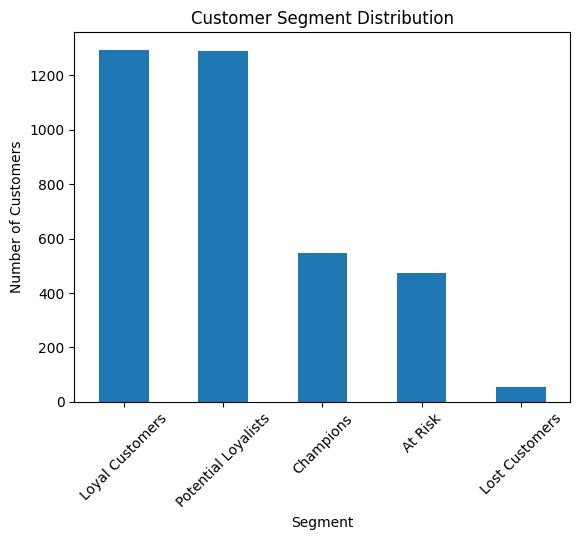

In [18]:
# Visualize Segment Counts
segment_counts = rfm['Segment'].value_counts()

plt.figure()
segment_counts.plot(kind='bar')
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Export CSV
rfm.to_csv("rfm_segments.csv")

print("RFM Segmentation Completed Successfully!")

RFM Segmentation Completed Successfully!
